In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']
data_df = pd.read_csv(r"C:\Users\digi max\Downloads\processed.cleveland.data", names=col_names, header=None, na_values="?")
data_df.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
print('shape of dataset:{}'.format(data_df.shape))
data_df.info()

shape of dataset:(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
sex                     303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [6]:
data_df.diagnosis = (data_df.diagnosis != 0).astype(int)
data_df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

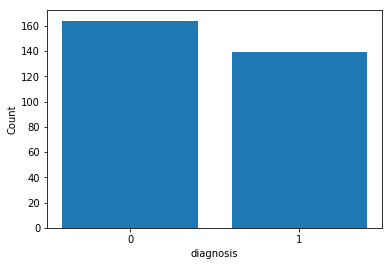

In [7]:
count = data_df.diagnosis.value_counts()
category = count.index
plt.bar(category, count)
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

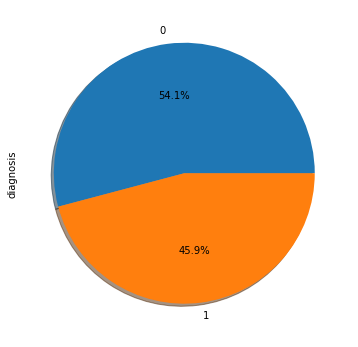

In [8]:
plt.figure(figsize=(10,6))
data_df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

In [9]:
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = ['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina',
                       'slope','no_of_vessels', 'thal']

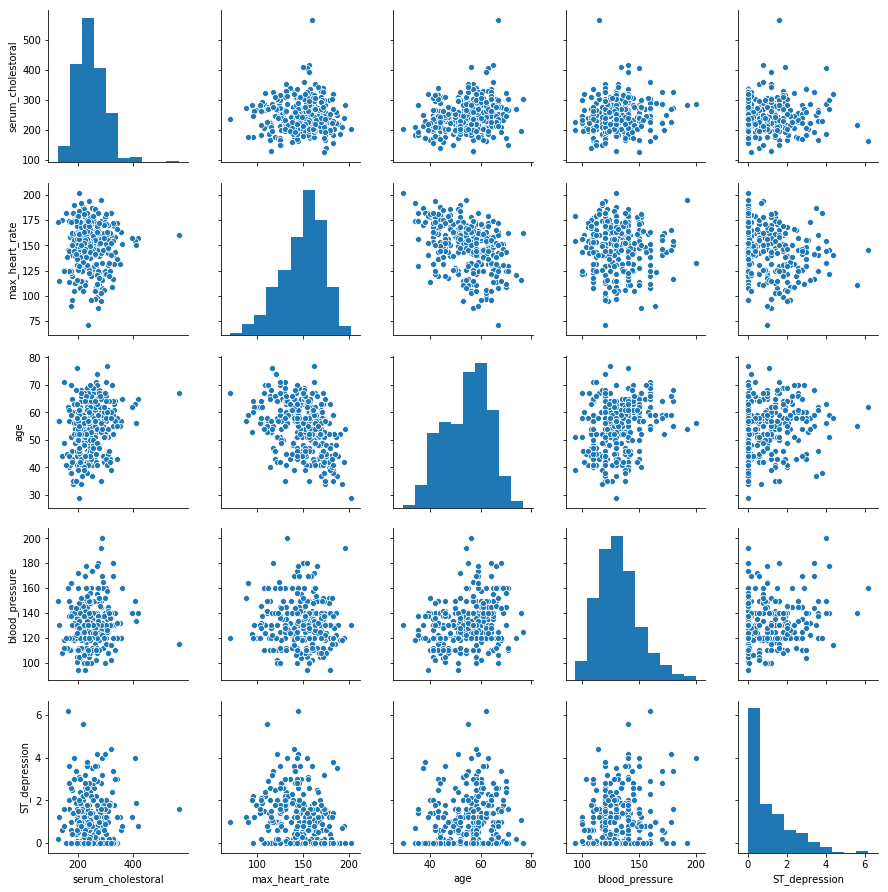

In [10]:
sb.pairplot(data_df[numeric_columns])
plt.show()

In [11]:
from scipy.stats.stats import pearsonr
pearson_coefficent, p_value = pearsonr(data_df.age, data_df.blood_pressure)
pearson_coefficent

0.28494591931369023

In [12]:
num_var = data_df[numeric_columns]
corr = num_var.corr()
corr

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
serum_cholestoral,1.000000,-0.003432,0.208950,0.130120,0.046564
max_heart_rate,-0.003432,1.000000,-0.393806,-0.045351,-0.343085
age,0.208950,-0.393806,1.000000,0.284946,0.203805
blood_pressure,0.130120,-0.045351,0.284946,1.000000,0.189171
ST_depression,0.046564,-0.343085,0.203805,0.189171,1.000000


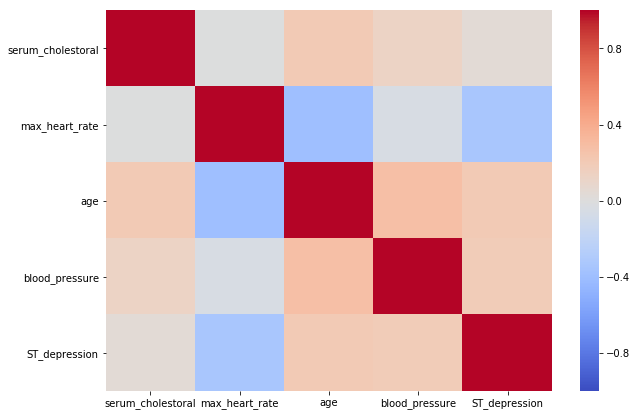

In [13]:
plt.figure(figsize=(10,7))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

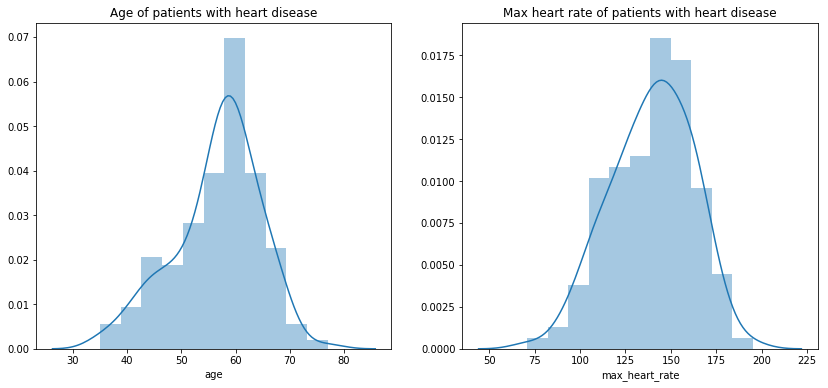

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.distplot(data_df[data_df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(1,2,2)
sb.distplot(data_df[data_df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [15]:
data_df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

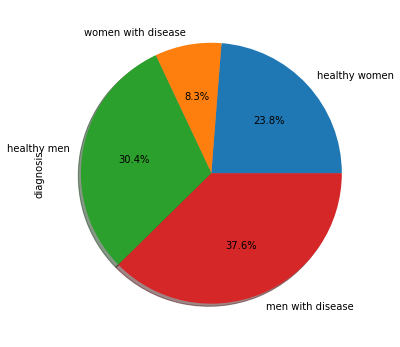

In [16]:
#sex(1 = male; 0 = female)
plt.figure(figsize=(10,6))
data_df.groupby(['sex','diagnosis'])['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,
        labels=['healthy women','women with disease','healthy men','men with disease'])

In [17]:
data_df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

In [18]:
data_df['no_of_vessels'].fillna(data_df['no_of_vessels'].mode()[0], inplace=True)
data_df['thal'].fillna(data_df['thal'].mode()[0], inplace=True)

In [19]:
x, y = data_df.iloc[:, :-1], data_df.iloc[:, -1]
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=
0.3, random_state=2606)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_score=knn.score(x_test, y_test)
print('score:', knn_score)

score: 0.8681318681318682


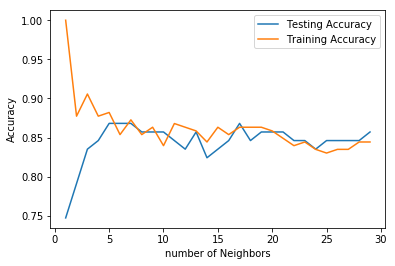

In [24]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()   

In [25]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)
from sklearn import metrics
metrics.accuracy_score(y_test, predict_dtc)

0.7582417582417582

In [27]:
param = {"max_depth": randint(1,8),"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9)}

In [28]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param, cv=5)

In [29]:
tree_cv.fit(x_train, y_train)
print(tree_cv.best_params_)

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 8}


C:\Users\digi max\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
tree_score = tree_cv.score(x_test, y_test)
print('score:', tree_score)

score: 0.7802197802197802


In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_score=gnb.score(x_test, y_test)
print('score:', gnb_score)

score: 0.8681318681318682


In [32]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
log_score=log.score(x_test, y_test)
print('score:', log.score(x_test, y_test))

score: 0.8571428571428571


C:\Users\digi max\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
print ("number of y_test: " + str(y_test.shape))

number of y_test: (91,)


In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 8, 31]], dtype=int64)

In [35]:
from sklearn.preprocessing import normalize

cm = normalize(cm,norm='l1',axis=1)
cm_df = pd.DataFrame(cm)
print(cm_df)

          0         1
0  0.903846  0.096154
1  0.205128  0.794872


In [39]:
# list of algorithms names
algorithms= ['KNN', 'Decision Trees', 'GaussianNB','Logistic Regression']
accuracy=np.array([knn_score, tree_score, gnb_score, log_score])

conclusion=pd.DataFrame({'accuracy':accuracy}, index=algorithms)
conclusion

,accuracy
KNN,0.868132
Decision Trees,0.780220
GaussianNB,0.868132
Logistic Regression,0.857143
